In [3]:
import pandas as pd

In [1]:
urls = ['https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures']

In [4]:
epl_df_list = []

for url in urls:
    epl_df_list.append(pd.read_html(url,index_col=False)[0])
    epl_df = pd.concat(epl_df_list, axis=0, ignore_index=True)

In [5]:
# remove na values
epl_df = epl_df[epl_df['Wk'].notna()]

In [6]:
epl_df = epl_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})

In [7]:
epl_df['HomeScore'] = epl_df['Score'].str[0]
epl_df['AwayScore'] = epl_df['Score'].str[2]

In [8]:
epl_df = epl_df.drop(['Match Report','Notes'],axis=1)

In [9]:
#convert to date

epl_df['Date'] = pd.to_datetime(epl_df['Date'])

In [10]:
epl_df.sort_values(by='Date', inplace=True)

In [11]:
epl_df = epl_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [12]:
epl_df.head()

,Wk,Day,Date,Time,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee
1732,1.0,Fri,2017-08-11,19:45,Arsenal,4,2.3,3,1.3,Leicester City,59387.0,Emirates Stadium,Mike Dean
1739,1.0,Sat,2017-08-12,17:30,Brighton,0,0.3,2,1.8,Manchester City,30415.0,The American Express Community Stadium,Michael Oliver
1733,1.0,Sat,2017-08-12,12:30,Watford,3,2.1,3,3.1,Liverpool,20407.0,Vicarage Road Stadium,Anthony Taylor
1734,1.0,Sat,2017-08-12,15:00,Southampton,0,2.1,0,0.5,Swansea City,31447.0,St. Mary's Stadium,Mike Jones
1735,1.0,Sat,2017-08-12,15:00,Chelsea,2,1.3,3,0.8,Burnley,41616.0,Stamford Bridge,Craig Pawson


In [13]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 1732 to 445
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Wk          1900 non-null   float64       
 1   Day         1900 non-null   object        
 2   Date        1900 non-null   datetime64[ns]
 3   Time        1900 non-null   object        
 4   Home        1900 non-null   object        
 5   HomeScore   1900 non-null   object        
 6   xGHome      1900 non-null   float64       
 7   AwayScore   1900 non-null   object        
 8   xGAway      1900 non-null   float64       
 9   Away        1900 non-null   object        
 10  Attendance  1460 non-null   float64       
 11  Venue       1900 non-null   object        
 12  Referee     1900 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 207.8+ KB


In [ ]:
epl_df.to_csv('epl_seasons_xg.csv')

In [21]:
attendance = epl_df.groupby(['Home']).sum()

In [22]:
attendance

,Wk,xGHome,xGAway,Attendance
Home,,,,
Arsenal,1844.0,166.7,116.2,4315033.0
Aston Villa,1113.0,73.4,83.8,1343524.0
Bournemouth,1097.0,75.6,78.0,549427.0
Brentford,370.0,26.7,19.9,321440.0
Brighton,1871.0,123.3,108.1,2179045.0
Burnley,1871.0,110.3,127.8,1456801.0
Cardiff City,356.0,23.3,26.5,596751.0
Chelsea,1835.0,170.4,77.8,2863513.0
Crystal Palace,1866.0,123.2,108.6,1811399.0


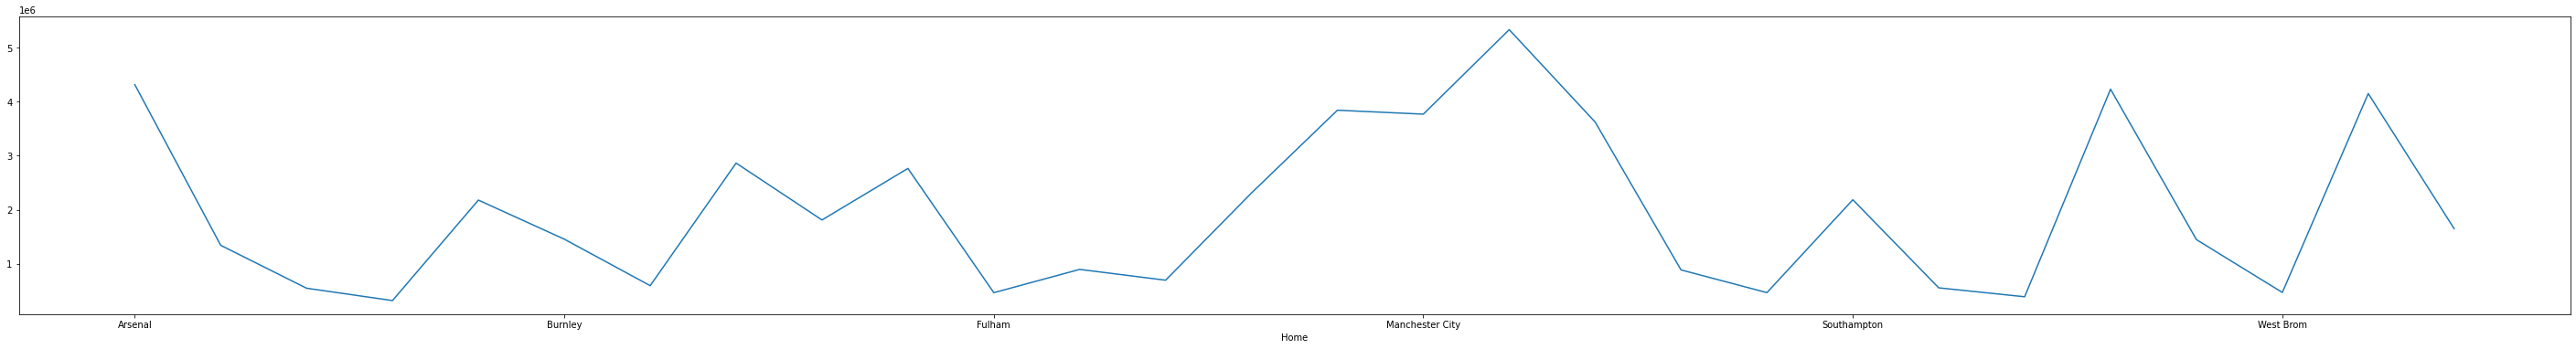

In [30]:
attendance['Attendance'].plot(figsize=(50,6))